Fonte: [https://projecteuler.net/problem=11](https://projecteuler.net/problem=11)

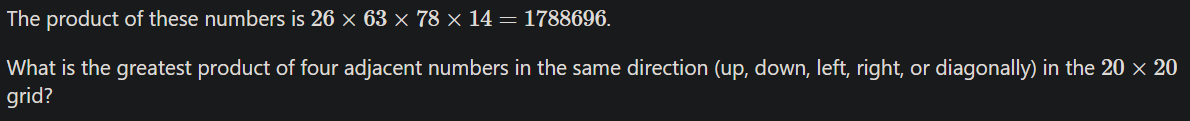

In [27]:
import numpy as np
import pandas as pd
import math

In [7]:
numeros = """
08 02 22 97 38 15 00 40 00 75 04 05 07 78 52 12 50 77 91 08
49 49 99 40 17 81 18 57 60 87 17 40 98 43 69 48 04 56 62 00
81 49 31 73 55 79 14 29 93 71 40 67 53 88 30 03 49 13 36 65
52 70 95 23 04 60 11 42 69 24 68 56 01 32 56 71 37 02 36 91
22 31 16 71 51 67 63 89 41 92 36 54 22 40 40 28 66 33 13 80
24 47 32 60 99 03 45 02 44 75 33 53 78 36 84 20 35 17 12 50
32 98 81 28 64 23 67 10 26 38 40 67 59 54 70 66 18 38 64 70
67 26 20 68 02 62 12 20 95 63 94 39 63 08 40 91 66 49 94 21
24 55 58 05 66 73 99 26 97 17 78 78 96 83 14 88 34 89 63 72
21 36 23 09 75 00 76 44 20 45 35 14 00 61 33 97 34 31 33 95
78 17 53 28 22 75 31 67 15 94 03 80 04 62 16 14 09 53 56 92
16 39 05 42 96 35 31 47 55 58 88 24 00 17 54 24 36 29 85 57
86 56 00 48 35 71 89 07 05 44 44 37 44 60 21 58 51 54 17 58
19 80 81 68 05 94 47 69 28 73 92 13 86 52 17 77 04 89 55 40
04 52 08 83 97 35 99 16 07 97 57 32 16 26 26 79 33 27 98 66
88 36 68 87 57 62 20 72 03 46 33 67 46 55 12 32 63 93 53 69
04 42 16 73 38 25 39 11 24 94 72 18 08 46 29 32 40 62 76 36
20 69 36 41 72 30 23 88 34 62 99 69 82 67 59 85 74 04 36 16
20 73 35 29 78 31 90 01 74 31 49 71 48 86 81 16 23 57 05 54
01 70 54 71 83 51 54 69 16 92 33 48 61 43 52 01 89 19 67 48
"""

matrix_original = np.array([[int(n) for n in linha.split(' ')] for linha in numeros.split('\n') if linha != ''])
print (matrix_original)

[[ 8  2 22 97 38 15  0 40  0 75  4  5  7 78 52 12 50 77 91  8]
 [49 49 99 40 17 81 18 57 60 87 17 40 98 43 69 48  4 56 62  0]
 [81 49 31 73 55 79 14 29 93 71 40 67 53 88 30  3 49 13 36 65]
 [52 70 95 23  4 60 11 42 69 24 68 56  1 32 56 71 37  2 36 91]
 [22 31 16 71 51 67 63 89 41 92 36 54 22 40 40 28 66 33 13 80]
 [24 47 32 60 99  3 45  2 44 75 33 53 78 36 84 20 35 17 12 50]
 [32 98 81 28 64 23 67 10 26 38 40 67 59 54 70 66 18 38 64 70]
 [67 26 20 68  2 62 12 20 95 63 94 39 63  8 40 91 66 49 94 21]
 [24 55 58  5 66 73 99 26 97 17 78 78 96 83 14 88 34 89 63 72]
 [21 36 23  9 75  0 76 44 20 45 35 14  0 61 33 97 34 31 33 95]
 [78 17 53 28 22 75 31 67 15 94  3 80  4 62 16 14  9 53 56 92]
 [16 39  5 42 96 35 31 47 55 58 88 24  0 17 54 24 36 29 85 57]
 [86 56  0 48 35 71 89  7  5 44 44 37 44 60 21 58 51 54 17 58]
 [19 80 81 68  5 94 47 69 28 73 92 13 86 52 17 77  4 89 55 40]
 [ 4 52  8 83 97 35 99 16  7 97 57 32 16 26 26 79 33 27 98 66]
 [88 36 68 87 57 62 20 72  3 46 33 67 46 55 12 32 63 93

In [11]:
matrix = matrix_original.copy()

print (f'{matrix.min()=} e {matrix.max()=}')

matrix.min()=0 e matrix.max()=99


In [52]:
matrix = matrix_original
dados = []

# percorrendo todas as linhas
for k, linha in enumerate(matrix):
    linha = list(linha)
    for c in range(len(linha)-4+1):
        numeros = linha[c:c+4]
        dados.append(['horizontal', k, c, str(numeros), math.prod(numeros)])


# percorrendo todas as colunas
for k, linha in enumerate(matrix.T):
    linha = list(linha)
    for c in range(len(linha)-4+1):
        numeros = linha[c:c+4]
        dados.append(['vertical', k, c, str(numeros), math.prod(numeros)])

# percorrendo as diagonais descendentes \
for l in range(len(matrix)-4+1):
    for c in range(len(matrix)-4+1):
        numeros = [matrix[l, c], matrix[l+1, c+1], matrix[l+2, c+2], matrix[l+3, c+3]]
        dados.append(['diagonal \\', l, c, str(numeros), math.prod(numeros)])

# percorrendo as diagonais descendentes /
for l in range(3, len(matrix)):
    for c in range(len(matrix)-4+1):
        numeros = [matrix[l, c], matrix[l-1, c+1], matrix[l-2, c+2], matrix[l-3, c+3]]
        dados.append(['diagonal /', l, c, str(numeros), math.prod(numeros)])


df = pd.DataFrame(dados, columns=['tipo', 'linha_ou_coluna', 'p_inicial', 'numeros', 'produto'])
df = df.sort_values(by='produto', ascending=False)
df.head(5)

,tipo,linha_ou_coluna,p_inicial,numeros,produto
1176,diagonal /,15,3,"[87, 97, 94, 89]",70600674
601,vertical,15,6,"[66, 91, 88, 97]",51267216
146,horizontal,8,10,"[78, 78, 96, 83]",48477312
995,diagonal /,4,9,"[92, 68, 67, 98]",41076896
961,diagonal \,16,9,"[94, 99, 71, 61]",40304286
